In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [6]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy],
)

cleandata (generic function with 1 method)

In [ ]:
function generatePlot(data::DataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::DataFrame, xs, ys; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for (x, y) in zip(xs, ys)
        vals = getfield.(data[:, y], :val)
        errs = getfield.(data[:, y], :err)
        scatter!(data[:, x], vals)
        errorbars!(data[:, x], vals, errs)
    end

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[1,1] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="L = $(key[1])")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 3 methods)

In [8]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy
,Float64,Float64,Int64,Int64,Measurem…,Measurem…
1,-2.0,0.2,20,20,1.04345±0.00025,-4.2851±0.00036
2,-1.9,0.2,20,20,1.05726±0.00024,-4.1744±0.00031
3,-1.8,0.2,20,20,1.02379±0.00037,-3.76461±0.00025
4,-1.7,0.2,20,20,1.03698±0.00014,-3.60353±0.00035
5,-1.6,0.2,20,20,1.03524±0.00025,-3.40032±0.00023
6,-1.5,0.2,20,20,1.01351±0.00052,-3.11083±0.0002
7,-1.4,0.2,20,20,1.0089±0.0027,-2.9449±0.00075
8,-1.3,0.2,20,20,0.9721±0.0019,-2.73422±0.00054
9,-1.2,0.2,20,20,0.9484±0.0047,-2.48852±0.00091


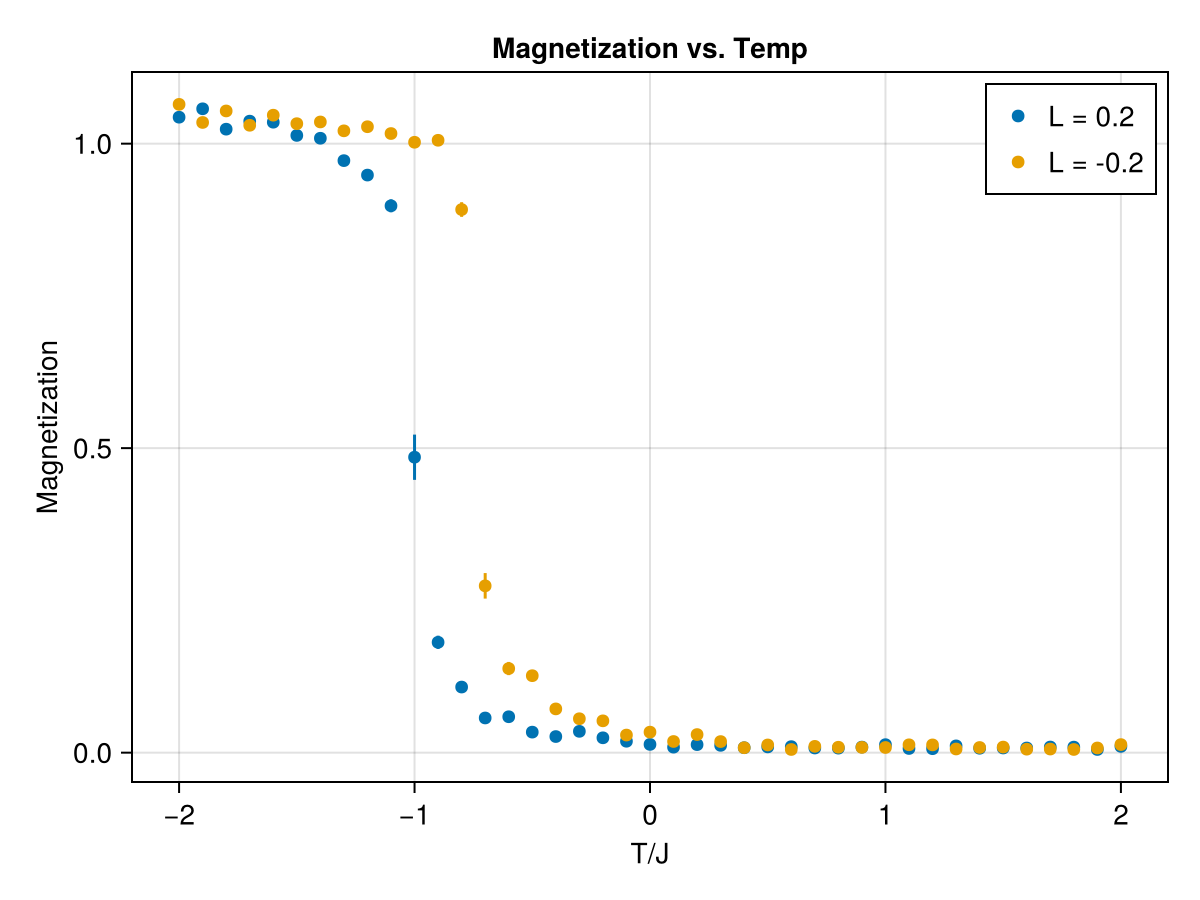

In [12]:
generatePlot(
    data, :J1, :Mag,
    title="Magnetization vs. Temp",
    xlabel="T/J",
    ylabel="Magnetization"
)

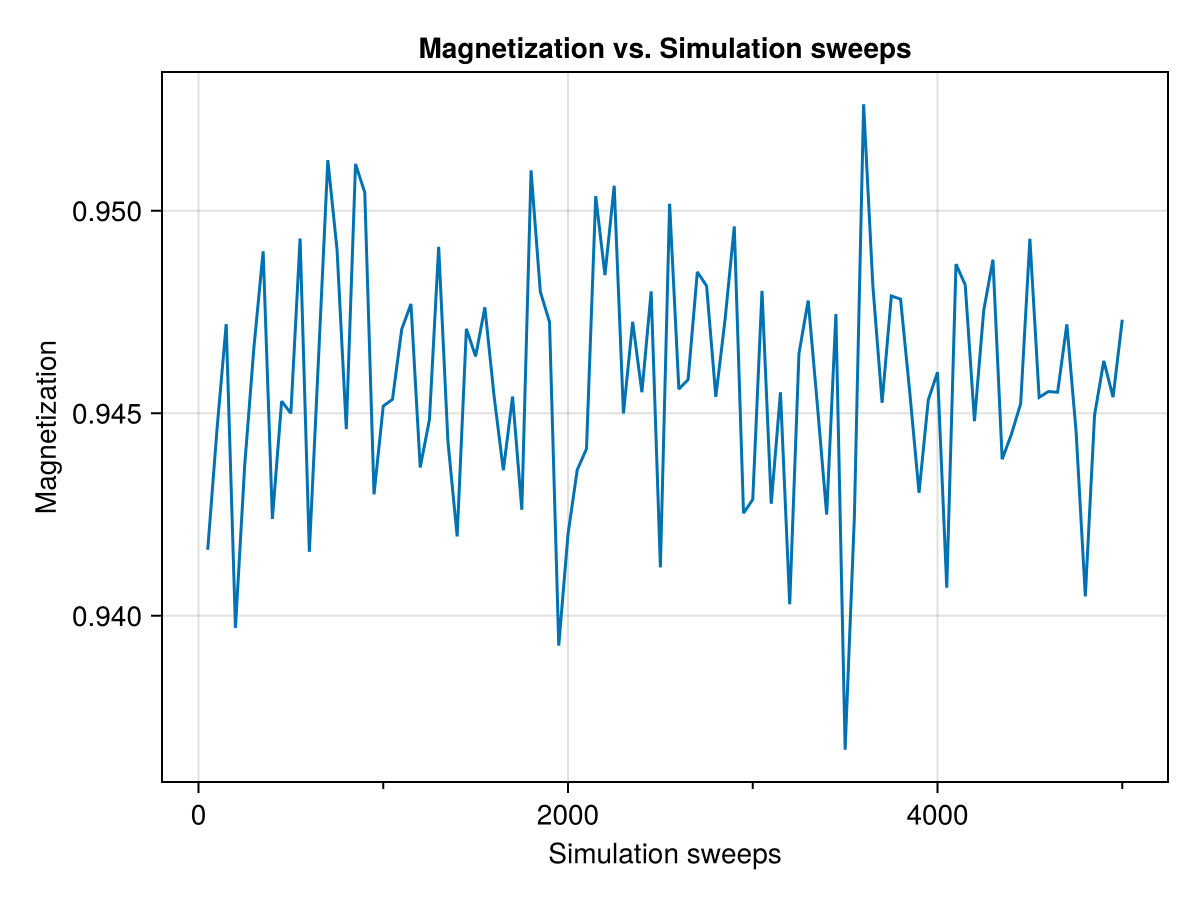

In [15]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Magnetization vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Magnetization",
    xminorticksvisible=true
)

h5open("../jobs/test-sweep.data/task0001/run0001.meas.h5") do file
    mag_group = file["observables/Mag"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig